In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from math import sqrt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, matthews_corrcoef, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('training_set.tsv',sep = '\t')
df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
df_benchmark

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q9BZS1,Homo sapiens (Human),Metazoa,NO_SP,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...
7451,O74327,Homo sapiens (Human),Metazoa,NO_SP,MSGYSPLSSGPADVHIGKAGFFSSVINLANTILGAGILSLPNAFTK...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7452,Q9UM00,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MSTMFADTLLIVFISVCTALLAEGITWVLVYRTDKYKRLKAEVEKQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7453,Q93Y07,Homo sapiens (Human),Metazoa,NO_SP,MELFALLIKVAGLLATVTVGANVVSYSRFRRQNLAKFRSPIDESKE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7454,Q86TL2,Mus musculus (Mouse),Metazoa,NO_SP,MQGPAGNASRGLPGGPPSTVASGAGRCESGALMHSFGIFLQGLLGV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [ ]:
#read the file in a dataframe
df = pd.read_csv('training_set.tsv',sep = '\t')
#select only the ones that are class sp
df_sp = df.query("Class == 'SP'")
#I calculate the length of the site
sp_length = df_sp['SP cleavage-site annotation'].str.count('S').tolist()
#I add a new column with the lengths
df_sp = df_sp.assign(s_length= sp_length)

#extract the cleavage sequences
cleavage_sequences = []
for sequence in df_sp['Sequence (first 50 N-terminal residues)']:
  for n in df_sp['s_length']:
    cleavage_sequences.append(sequence[:n])
cleavage_sequences


length = df_sp['s_length']
seq = df_sp['Sequence (first 50 N-terminal residues)']
#calculates the cleavage site
cleavage_seq=[] #add to list all the cleaveage sites sequences
for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])
cleavage_seq

training_seq_list_sp = cleavage_seq
training_seq_list_all = df['Sequence (first 50 N-terminal residues)']

In [ ]:
training_seq_list_sp

['TFLLLALSTAAQAEP',
 'FIMALFIAVESSPIF',
 'FLAICLSLTVALAAE',
 'LSLLFTLLSLSQSTN',
 'ISLALLLMIGVESVR',
 'IIFPNEFSKPTRAFS',
 'LFSTATLISTGWGLD',
 'ILLQFSAWTTTDAVT',
 'LLCLAAVLRQSFGNV',
 'VIAFSTVHQTVAAVD',
 'LLLLLASVSLALGDP',
 'GALFLALLAGAHAEF',
 'FSLALLLMTGVESVR',
 'DPIAEIERSNCKIAH',
 'VLTVLLMGTGCISAP',
 'FLTLVSFSNMSDQAG',
 'LLLLAGLAHGASALF',
 'ALLVLLFCFRGRAGP',
 'ISFALLLMKGVESVR',
 'VALLFSHVDHISAET',
 'LLWASLLSGVLAGRA',
 'WALLLLWSPCTFSLP',
 'IVVLLLVIAFSHGAV',
 'FLLFLIATTRGWSTD',
 'VLLVSCFLSQGAAIE',
 'LLFLVLSAGSGISGP',
 'LLALALILPGTLCAE',
 'LVLIAFTCYTCSDAT',
 'IFLVLLVATSAYAAP',
 'TLVLFLLAQVSWAGP',
 'SVFFLLLPGPSAADE',
 'LPILAAVLQQSSGNV',
 'ILLLLSLVASIFSTP',
 'LLFLVLSAGSGFTQG',
 'QSLTVSRGGLVAADR',
 'LVVTIVCLDLASTMI',
 'LPPLLLTPRAGDAAV',
 'ASLVFFLCQMISALD',
 'VAMSLVSCSTAAPAK',
 'LLALLLLAAAAEAAK',
 'VFVFCFLIKLLTGEL',
 'FLAVSLLCALANAYP',
 'VLALLLLCSYTCGSQ',
 'LGLFLLLPRPVPAPC',
 'FVLLLSEIVSISASS',
 'WFAIATLITICYAAK',
 'LWLPTSGLWTVQAMD',
 'CLMLAGLCSLVTSHL',
 'CAVLALVLAPAGAFR',
 'LLILACFVALALARA',


In [ ]:
#do the same but with benchmark

#read the file in a dataframe
df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
#select only the ones that are class sp
df_benchmark_sp = df_benchmark.query("Class == 'SP'")
#I calculate the length of the site
benchmark_sp_length = df_benchmark_sp['SP cleavage-site annotation'].str.count('S').tolist()
#I add a new column with the lengths
df_benchmark_sp = df_benchmark_sp.assign(s_length = benchmark_sp_length)

#extract the cleavage sequences
benchmark_cleavage_sequences = []
for sequence in df_benchmark_sp['Sequence (first 50 N-terminal residues)']:
  for n in df_benchmark_sp['s_length']:
    benchmark_cleavage_sequences.append(sequence[:n])
benchmark_cleavage_sequences

['MARNMNILTLFAVLIGSASA',
 'MARNMNILTLFAVLIG',
 'MARNMNILTLFAVLIGSASAVYHPPSWTAWI',
 'MARNMNILTLFAVLIGSASAVYHPPSWTA',
 'MARNMNILTLFAVLIGSASA',
 'MARNMNILTLFAVLIGSASAVYHPPS',
 'MARNMNILTLFAVLIGSASAVYHPP',
 'MARNMNILTLFAVLIG',
 'MARNMNILTLFAVLIGSASAVYHPPSWTAW',
 'MARNMNILTLFAVLIGSAS',
 'MARNMNILTLFAVLIGSASA',
 'MARNMNILTLFAVLIGSA',
 'MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWK',
 'MARNMNILTLFAVLIGSAS',
 'MARNMNILTLFAVLIGSASA',
 'MARNMNILTLFAVLIG',
 'MARNMNILTLFAVLIGSASAVYHPPSWTAWIAP',
 'MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKV',
 'MARNMNILTLFAVLIGSASAVYH',
 'MARNMNILTLFAVLIGSASAVYHPPSW',
 'MARNMNILTLFAVLIGSASAVYHPPSWTAWIA',
 'MARNMNILTLFAVLIGSASAVYHPPSWTAWI',
 'MARNMNILTLFAVLIGSA',
 'MARNMNILTLFAVLIG',
 'MARNMNILTLFAVLIGSASAVYHPPSWTA',
 'MARNMNILTLFAVLIGSASAVYH',
 'MARNMNILTLFAVLIGSAS',
 'MARNMNILTLFAVLIGSASAVYHP',
 'MARNMNILTLFAVLIGSASAVYHPPSWT',
 'MARNMNILTLFAVLIGSASAV',
 'MARNMNILTLFAVL',
 'MARNMNILTLFAVLIGSAS',
 'MARNMNILTLFAVLIGSAS',
 'MARNMNILTLFAVLIGSA',
 'MARNMNILTLFAVLIGSASAV',
 'MA

In [ ]:
# OK
#Training matrix
#Intialize the position-specific weight matrix (pswm) as a matrix of ones)

aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_bc_list=[0.0825,0.0393,0.0965,0.0664,0.0553,0.0672,0.0580,0.0535,0.0406,0.0707,0.0241,0.0110,0.0546,0.0227,0.0386,0.0292,0.0138,0.0591,0.0474,0.0686]

def create_matrix(df, aa_list, aa_bc_list):
  '''This function creates the matrix used to score the predictions'''

  #create the cleavage sequences from the dataframe

  #select only the ones that are class sp
  df_sp = df.query("Class == 'SP'")
  #I calculate the length of the site
  sp_length = df_sp['SP cleavage-site annotation'].str.count('S').tolist()
  #I add a new column with the lengths
  df_sp = df_sp.assign(s_length = sp_length)

  length = df_sp['s_length']
  seq = df_sp['Sequence (first 50 N-terminal residues)']

  #calculates the cleavage site
  cleavage_seq=[] #add to list all the cleaveage sites sequences
  for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])

  #creating a dictionary from the list of aminoacids and the percentages
  aa_bc_dict={}
  for i,j in zip(aa_list,aa_bc_list):
    aa_bc_dict[i]=j

  pswm = np.ones ((20,15))
  #create a dictionary to map in the right position
  aa_dict = {}
  for aa,i in zip (aa_list,range(20)):
    aa_dict[aa]=i

  for seq in cleavage_seq:
    for i in enumerate(seq):
      pswm[aa_dict[i[1]],i[0]]+=1 #insert in the matrix the weights
  pswm = pswm/(len(cleavage_seq)+20) #obtain the percentage

  for m,n in zip(range(len(pswm)),aa_list):
    for k in range(len(pswm[m])):
    #print(pswm[i][k])
      pswm[m][k] = np.log2(pswm[m][k]/aa_bc_dict[n])
  return pswm

#I call the function

create_matrix(df, aa_list,aa_bc_list)

array([[-0.27155149,  0.52491512,  0.650446  ,  0.18096072,  1.18096072,
         0.60980401,  0.12437719,  0.838073  ,  0.97237409,  0.12437719,
         1.56798384, -0.19755091,  2.46920568,  0.650446  , -0.71212408],
       [-1.86465169, -2.4496142 , -2.4496142 , -1.86465169, -2.4496142 ,
        -1.4496142 , -1.1276861 , -1.4496142 ,  0.4572764 , -0.1276861 ,
        -2.4496142 ,  1.25082552, -1.4496142 ,  0.35774073,  0.00981742],
       [ 2.07456514,  2.0225705 ,  1.85429902,  2.08727619,  1.61193818,
         1.89824236,  1.80897503,  1.2316661 , -0.57568882,  0.71381779,
        -1.9382589 ,  0.29878029, -2.42368573, -0.3532964 , -1.04517411],
       [-0.50582841, -0.3989132 , -0.29937753, -1.20626812,  0.04165939,
         0.1860493 ,  0.11565997, -0.20626812,  0.74792819,  0.25316349,
         0.92301489,  0.43758807,  0.92301489,  0.1860493 , -0.11880528],
       [-2.94236436, -2.94236436, -3.94236436, -3.94236436, -3.94236436,
        -3.94236436, -1.35740186, -2.94236436, 

In [ ]:
 #Now i have to predict the scores of the sequences in the training set
#Transform this in a function

aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']

def predictions(pswm, aa_list, dataframe):
  '''This function calculates the predicted aminoacids'''
  dict_scores = {}
  for sequence, id in zip(dataframe['Sequence (first 50 N-terminal residues)'], dataframe['UniProtKB accession']):
    max_score = -1000
    for i in range(len(sequence)-14):
      seq_15 = sequence[i:i+15]
    #Now I need to calculate the score of the sequences and store in the dictionary only the best value
      score = 0
      for position,residue in enumerate(seq_15):
        score = score + pswm[aa_list.index(residue),position]
      if score > max_score:
        max_score = score
    dict_scores[id] = max_score
  return dict_scores

# I call the matrix function I used before
pswm = create_matrix(df, aa_list,aa_bc_list)

#I call the function to predict the scores
predictions(pswm, aa_list, df)


{'P61916': 14.543297253947026,
 'Q7M3V1': 7.479935719052482,
 'Q08738': 14.093130932989162,
 'Q41350': 13.865073369278152,
 'Q86SE1': 11.445876571151576,
 'Q8L5J1': 1.1379154839775287,
 'P35495': 9.88262598636033,
 'P20656': 9.920042815184383,
 'P84805': 11.269237336628807,
 'Q9LVC0': 6.563385135257306,
 'P12387': 18.253123071616184,
 'P55058': 14.361777414796823,
 'Q4TUA4': 13.920260126949461,
 'Q09117': 0.04198643386567169,
 'Q92154': 12.255627679691434,
 'P02742': 6.659474605818329,
 'P11438': 16.198844039295228,
 'Q6UWL6': 13.923591670158446,
 'O61705': 9.972604632677962,
 'P48765': 8.714845784038495,
 'Q2ULM2': 14.450891702784746,
 'P06281': 14.71202518890825,
 'Q5W280': 12.450975804024432,
 'Q8WWA0': 12.300216730727433,
 'P10607': 11.460660041084699,
 'P46169': 13.856566084376652,
 'P04275': 15.662538549012595,
 'P42660': 9.361459028617722,
 'P21828': 16.65590970523251,
 'Q01129': 17.170258639656748,
 'P80311': 14.066871992382506,
 'Q8JI40': 9.592258051737613,
 'Q5XM24': 14.09789

In [ ]:
#Function to calculate the true values
def true_values(df_training):
  '''This function takes the training data after the 5 fold division
    and returns the true 'Class' values in the format 0 or 1'''
  y_true_values = df_training['Class'].tolist()
  for i in range(len(y_true_values)): #create a list of 0 and 1 to perform the prcedure on sklearn
    if y_true_values[i] == 'SP':
      y_true_values[i] = 1
    else:
      y_true_values[i] = 0
  return y_true_values

In [ ]:
aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_bc_list=[0.0825,0.0393,0.0965,0.0664,0.0553,0.0672,0.0580,0.0535,0.0406,0.0707,0.0241,0.0110,0.0546,0.0227,0.0386,0.0292,0.0138,0.0591,0.0474,0.0686]

n_folds = 5

training = pd.read_csv('training_set.tsv',sep = '\t')

list_optimal_thresholds = []
list_mcc = []
list_accuracy = []
list_optimal_precision = []
list_optimal_recall = []
list_optimal_f1_score = []
for validation_fold_n in range(5):
  #5 fold division
  training_iter = training.loc[training['Cross-validation fold'] != validation_fold_n]
  test_iter = training.loc[training['Cross-validation fold'] == validation_fold_n]

  #true values
  y_true_training_values = true_values(training_iter)
  y_true_test_values = true_values(test_iter)


  #3 generation of profiles for training
  pswm = create_matrix(training_iter, aa_list,aa_bc_list)

  #4 predictions for the training set
  training_predictions = predictions(pswm, aa_list, training_iter) #I get a dictionary
  y_training_predictions = list(training_predictions.values()) # I get the scores

  #5 precision-recall curve values
  precision, recall, thresholds = precision_recall_curve(y_true_training_values, y_training_predictions)

  #6 compute f-scores at varying thresholds
  fscore = (2 * precision * recall) / (precision + recall)

  # accuracy score is not necessary since we have matthew correlation coefficient


  #7 get the index of the maximum value of the f-score
  index = np.argmax(fscore)

  #8 retrieve the threshold value corresponding to the max f-score computed above
  optimal_threshold = thresholds[index]

  optimal_precision = precision[index]
  optimal_recall = recall[index]
  optimal_f1_score = (2 * optimal_precision * optimal_recall) / (optimal_precision + optimal_recall)

  #9 create a list of the optimal thresholds for the benchmarking step
  list_optimal_thresholds.append(optimal_threshold)
  list_optimal_precision.append(optimal_precision)
  list_optimal_recall.append(optimal_recall)
  list_optimal_f1_score.append(optimal_f1_score)

  #10 predictions for the testing set
  testing_predictions = predictions(pswm, aa_list, test_iter)
  y_test_scores = list(testing_predictions.values())

  #classify examples in the testing set
  y_test_predictions = [int(t_s >= optimal_threshold) for t_s in y_test_scores]

  #calculate MCC and accuracy
  mcc = matthews_corrcoef(y_true_test_values, y_test_predictions)
  accuracy = sk.accuracy_score(y_true_test_values, y_test_predictions)
  #append the values of MCC and accuracy to a list
  list_mcc.append(mcc)
  list_accuracy.append(accuracy)

  #Calculate accuracy

  print('The optimal treshold for the cross-validation that tests on set {} is {:.2f}'.format(validation_fold_n, optimal_threshold))
  print('MCC = {:.2f}, Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, f1_score = {:.3f}'.format(mcc, accuracy, optimal_precision, optimal_recall, optimal_f1_score))
  print('---------------------------------------------------------------------')

average_optimal_threshold = np.mean(list_optimal_thresholds)

average_mcc = np.mean(list_mcc)
average_accuracy = np.mean(list_accuracy)
average_optimal_precision = np.mean(list_optimal_precision)
average_optimal_recall = np.mean(list_optimal_recall)
average_optimal_f1_score = np.mean(list_optimal_f1_score)

standard_error_mcc = np.std(list_mcc)/sqrt(n_folds)
standard_error_acc = np.std(list_accuracy)/sqrt(n_folds)
standard_error_precision = np.std(list_optimal_precision)/sqrt(n_folds)
standard_error_recall = np.std(list_optimal_recall)/sqrt(n_folds)
standard_error_f1_score_value = np.std(list_optimal_f1_score)/sqrt(n_folds)

print('Average values: MCC = {:.2f} ± {:.2f}, Accuracy = {:.2f} ± {:.3f}, Precision = {:.2f} ± {:.2f},  Recall = {:.2f} ± {:.2f}, f1_score = {:.3f} ± {:.3f}'.format(
    mcc,
    standard_error_mcc,
    accuracy,
    standard_error_acc,
    optimal_precision,
    standard_error_precision,
    optimal_recall,
    standard_error_recall,
    optimal_f1_score,
    standard_error_f1_score_value))
#associate the standard errors
#The standard error is calculated as standard deviation divided by square root of the number of groups
#
print("Average threshold", average_optimal_threshold)


The optimal treshold for the cross-validation that tests on set 0 is 7.93
MCC = 0.81, Accuracy = 0.95, Precision = 0.84, Recall = 0.89, f1_score = 0.863
---------------------------------------------------------------------
The optimal treshold for the cross-validation that tests on set 1 is 7.87
MCC = 0.75, Accuracy = 0.93, Precision = 0.87, Recall = 0.88, f1_score = 0.877
---------------------------------------------------------------------
The optimal treshold for the cross-validation that tests on set 2 is 8.61
MCC = 0.80, Accuracy = 0.95, Precision = 0.90, Recall = 0.87, f1_score = 0.885
---------------------------------------------------------------------
The optimal treshold for the cross-validation that tests on set 3 is 8.04
MCC = 0.76, Accuracy = 0.94, Precision = 0.85, Recall = 0.88, f1_score = 0.869
---------------------------------------------------------------------
The optimal treshold for the cross-validation that tests on set 4 is 8.58
MCC = 0.80, Accuracy = 0.95, Preci

### Benchmarking

In [ ]:
#Method testing
df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
#true values
y_true_values_df_benchmark = true_values(df_benchmark)
#predictions
benchmark_predictions = predictions(pswm, aa_list, df_benchmark)
y_benchmark_scores = list(benchmark_predictions.values())
#
y_test_pred = [int(y >= average_optimal_threshold) for y in y_benchmark_scores]

mcc = matthews_corrcoef(y_true_values_df_benchmark, y_test_pred)
accuracy = sk.accuracy_score(y_true_values_df_benchmark, y_test_pred)
# mcc

precision_bench = sk.precision_score(y_true_values_df_benchmark, y_test_pred)
recall_bench = sk.recall_score(y_true_values_df_benchmark, y_test_pred)
f1_bench = sk.f1_score(y_true_values_df_benchmark, y_test_pred)
#calculate the standard errors and f1_score

print("MCC:", mcc,'\n', 'Accuracy: ', accuracy, "\n", "precision:", precision_bench, "\n", "recall:", recall_bench, "\n", "f1_score:", f1_bench)

MCC: 0.578324324549148 
 Accuracy:  0.9704935622317596 
 precision: 0.48253968253968255 
 recall: 0.7272727272727273 
 f1_score: 0.5801526717557252


In [ ]:
# final MCC should be 0.58

##False positive analysis

In [ ]:
total_negatives_id = []
total_negatives = df_benchmark.loc[df_benchmark['Class'] == 'NO_SP']
for id in total_negatives['UniProtKB accession']:
  total_negatives_id.append(id)
total_negatives_id

with open("total_negatives.txt", "w") as output:
  for item in total_negatives_id:
    output.write(str(item)+'\n')


In [ ]:
df_benchmark_2 = df_benchmark.assign(Prediction = y_test_pred) # 0 = NO_SP , 1 = SP

In [ ]:
#I first add a new column to the dataframe, containing the prediction made in the benchmarking
false_positives_id = []
df_false_positives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'NO_SP']
df_false_positives = df_false_positives.loc[df_false_positives['Prediction'] == 1]
for id in df_false_positives['UniProtKB accession']:
  false_positives_id.append(id)
false_positives_id

with open("false_positives_vonHenje.txt", "w") as output:
  for item in false_positives_id:
    output.write(str(item)+'\n')
  print('Done')

Done


In [ ]:
#Testo copiato dall'altro colab file
#false positive rate
len(false_positives_id)
total_negatives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'NO_SP']
len(total_negatives)
false_positive_rate = len(false_positives_id)/len(total_negatives)
false_positive_rate

0.022492065682351316

In [ ]:
#code to get from the uniprot file the elements
false_positives_uniprot = open('false_positives_VH.tsv', 'r')
tm_evidence = {}
eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']
tm_proteins = set([])
for line in false_positives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 2:
    acc = line[0]
    tm_field = line[2]
    if tm_field != '':
      in_tm = False
      for k in tm_field.split():
        if k == 'TRANSMEM':
          in_tm = True
        elif k.startswith('/note'):
          pass
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in tm_evidence:
              tm_evidence[acc] = set([])
            tm_evidence[acc].add(eco)
        else:
          if in_tm == True:
            if '..' in k:
              i = k.split('..')[1]
              i = i.replace(';', '')
              if int(i) <= 50:
                tm_proteins.add(acc) #tm_proteins contains all the uniprot accession number with transmembrane in the first 50 residues
#for acc in tm_proteins:
len(tm_proteins)

40

In [ ]:
total_negatives_uniprot = open('total_negatives_uniprot.tsv', 'r')
tm_evidence_total = {}
eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']
tm_proteins_total = set([])
for line in total_negatives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 2:
    acc = line[0]
    tm_field = line[2]
    if tm_field != '':
      in_tm = False
      for k in tm_field.split():
        if k == 'TRANSMEM':
          in_tm = True
        elif k.startswith('/note'):
          pass
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in tm_evidence_total:
              tm_evidence_total[acc] = set([])
            tm_evidence_total[acc].add(eco)
        else:
          if in_tm == True:
            if '..' in k:
              i = k.split('..')[1]
              i = i.replace(';', '')
              if int(i) <= 50:
                tm_proteins_total.add(acc) #tm_proteins contains all the uniprot accession number with transmembrane in the first 50 residues

tm_proteins_total_annotated = []
for id in tm_proteins_total:
  if id in tm_evidence_total.keys():
    tm_proteins_total_annotated.append(id)
len(tm_proteins_total_annotated)


141

In [ ]:
#Calculating the ratio of false positives that have a transmembrane
len(tm_proteins)/len(tm_proteins_total_annotated)

0.28368794326241137

In [ ]:
#code to get from the uniprot file the elements
false_positives_uniprot = open('false_positives_VH.tsv', 'r')
transit_evidence_total = {}
transit_proteins_total = set([])

eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']

for line in false_positives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 3:
    acc = line[0]
    transit_field = line[3]
    if transit_field != '':
      for k in transit_field.split():
        if k == 'TRANSIT':
          transit_proteins_total.add(acc) #all proteins with transit peptide
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in transit_evidence_total:
              transit_evidence_total[acc] = set([])
            transit_evidence_total[acc].add(eco)

#len(transit_Mitochondrion_id) #795
#len(transit_Chloroplast_id)
#len(transit_Peroxisome_id)

transit_proteins_positives = []
for id in transit_proteins_total:
  if id in transit_evidence_total.keys():
    transit_proteins_positives.append(id)

len(transit_proteins_positives)


48

In [ ]:
#code to get from the uniprot file the elements
total_negatives_uniprot = open('total_negatives_uniprot.tsv', 'r')
transit_evidence_total = {}
transit_proteins_total = set([])

eco_set = ['ECO:0000269','ECO:0000303','ECO:0000305','ECO:0000250','ECO:0000255','ECO:0000255','ECO:0000312','ECO:0007744']

for line in total_negatives_uniprot:
  line = line.strip().split('\t')
  if len(line) > 3:
    acc = line[0]
    transit_field = line[3]
    if transit_field != '':
      for k in transit_field.split():
        if k == 'TRANSIT':
          transit_proteins_total.add(acc) #all proteins with transit peptide
        elif k.startswith('/evidence'):
          for eco in eco_set:
            if acc not in transit_evidence_total:
              transit_evidence_total[acc] = set([])
            transit_evidence_total[acc].add(eco)

#len(transit_Mitochondrion_id) #795
#len(transit_Chloroplast_id)
#len(transit_Peroxisome_id)

transit_proteins_negatives = []
for id in transit_proteins_total:
  if id in transit_evidence_total.keys():
    transit_proteins_negatives.append(id)

len(transit_proteins_negatives)

1337

In [ ]:
len(transit_proteins_positives)/len(transit_proteins_negatives)

0.03590127150336574

#False negative analysis
Compute the logo of the false negatives and of the true positives, comparing them

In [ ]:
df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
#select only the ones that are class sp
df_benchmark_sp = df_benchmark.query("Class == 'SP'")
#I calculate the length of the site
sp_length_benchmark = df_benchmark_sp['SP cleavage-site annotation'].str.count('S').tolist()
#I add a new column with the lengths
df_benchmark_sp = df_benchmark_sp.assign(s_length= sp_length_benchmark)

#extract the cleavage sequences
cleavage_sequences = []
for sequence in df_benchmark_sp['Sequence (first 50 N-terminal residues)']:
  for n in df_benchmark_sp['s_length']:
    cleavage_sequences.append(sequence[:n])
cleavage_sequences

#aligned cleavage sequences

length = df_benchmark_sp['s_length']
seq = df_benchmark_sp['Sequence (first 50 N-terminal residues)']
#calculates the cleavage site
cleavage_seq=[] #add to list all the cleaveage sites sequences
for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])
cleavage_seq

benchmark_seq_list_sp = cleavage_seq
benchmark_seq_list_sp

['LTLFAVLIGSASAVY',
 'ILLMVVVLALSSAQD',
 'FLVCAFWIPDSRGMP',
 'LLLHAAFHGGALGEK',
 'CLSVASLVSYAGAAS',
 'FLLLVAAPRWVLSQL',
 'IILFASILAAISATS',
 'LLILVSLAALAHAES',
 'FLSAALSLWPTSGEI',
 'LFLAAVAGALVYAED',
 'MERANHSLVRMRREG',
 'ALCFVLLVGFAAACQ',
 'LLLLAGLALVGEART',
 'YVWPLLLCSPCLLIQ',
 'FFLSCSFVSLVSSEK',
 'LLWASLLSGVLAGRA',
 'MLLLCLGVPTGRPYN',
 'LLLLLPPPPRVGGFN',
 'LLLGLQLFAKAWSYN',
 'AALISVSLSGTLANR',
 'ALMVAAGGCVVSAFN',
 'LLLGPCAAPPAWALN',
 'TLLCIASLALLAAFN',
 'RVLLLTALTLCHGFN',
 'LALSQGILNCCLAYN',
 'LFVCSMIIGICEGRE',
 'LVAGVVAVSAALASK',
 'VLLASVLWVTVRSQQ',
 'VIMTIMPDMKVEAVS',
 'FLVIMVISSLVDCAK',
 'LLTISDFLFLSLTFS',
 'LLLALLTLGLAAQHQ',
 'LLTLLTQDTGSWAQS',
 'PVLALAFGSLAAAAP',
 'ALCCGLLAASAHAGY',
 'WLLLAALLGCTLAEE',
 'RILAIVFAARHVAAL',
 'AAFLFLSWTHCRALP',
 'LAHQHHQHKEEKRAV',
 'LAVVIFIINDVSSQG',
 'LLAFLHSASLLNGDS',
 'LALFGFLWEASGGLD',
 'LLQLLLLVGPGGCLN',
 'LLLLPLLMLRAAALH',
 'FIVTMLIVDEVNSFK',
 'LVVGLAAVAGVDGAT',
 'VICMVVIAPMAEAAL',
 'IAFALCLHHLISAIE',
 'LSLALLGIQVARSAI',
 'VFVTLRVIAAVISEE',


In [ ]:
with open('cleavage_benchmark_sequences', 'w') as fp:
    for item in benchmark_seq_list_sp:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

#CUT THE LOGO FROM 0 to 2

Done


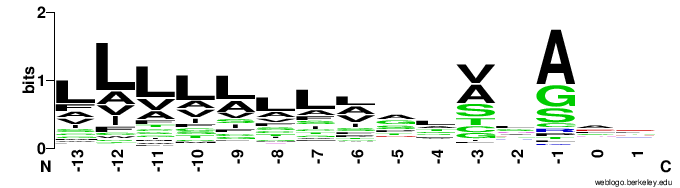

In [ ]:
df_benchmark_2 = df_benchmark.assign(Prediction = y_test_pred) # 0 = NO_SP , 1 = SP
# False positives are 'Class' == NO_SP and 'Predicted' == 1
# True negatives are 'Class' == NO_SP and 'Predicted' == 0
df_benchmark_2

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation,Prediction
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
2,Q9BZS1,Homo sapiens (Human),Metazoa,NO_SP,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
...,...,...,...,...,...,...,...
7451,O74327,Homo sapiens (Human),Metazoa,NO_SP,MSGYSPLSSGPADVHIGKAGFFSSVINLANTILGAGILSLPNAFTK...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
7452,Q9UM00,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MSTMFADTLLIVFISVCTALLAEGITWVLVYRTDKYKRLKAEVEKQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
7453,Q93Y07,Homo sapiens (Human),Metazoa,NO_SP,MELFALLIKVAGLLATVTVGANVVSYSRFRRQNLAKFRSPIDESKE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0
7454,Q86TL2,Mus musculus (Mouse),Metazoa,NO_SP,MQGPAGNASRGLPGGPPSTVASGAGRCESGALMHSFGIFLQGLLGV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,0


### List fase negatives

In [ ]:
df_false_negatives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'SP']
df_false_negatives = df_false_negatives.loc[df_false_negatives['Prediction'] == 0]

sp_length_benchmark = df_false_negatives['SP cleavage-site annotation'].str.count('S').tolist()
#I add a new column with the lengths
df_false_negatives = df_false_negatives.assign(s_length= sp_length_benchmark)

#extract the cleavage sequences
cleavage_sequences = []
for sequence in df_false_negatives['Sequence (first 50 N-terminal residues)']:
  for n in df_false_negatives['s_length']:
    cleavage_sequences.append(sequence[:n])
cleavage_sequences

#aligned cleavage sequences

length = df_false_negatives['s_length']
seq = df_false_negatives['Sequence (first 50 N-terminal residues)']
#calculates the cleavage site
cleavage_seq=[] #add to list all the cleaveage sites sequences
for l,s in zip(length, seq ):
    cleavage_seq.append(s[l - 13:l + 2])
cleavage_seq

benchmark_false_negatives_cleavage = cleavage_seq
benchmark_false_negatives_cleavage

with open('cleavage_benchmark_sequences_false_negatives', 'w') as fp:
    for item in benchmark_false_negatives_cleavage:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


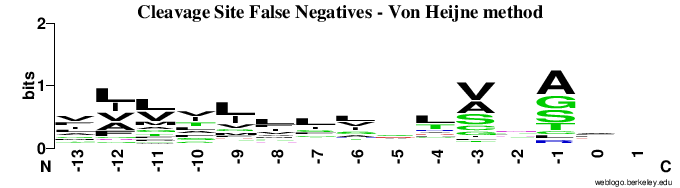

In [ ]:
training_seq_list_sp
with open('cleavage_training_sequences', 'w') as fp:
    for item in training_seq_list_sp:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


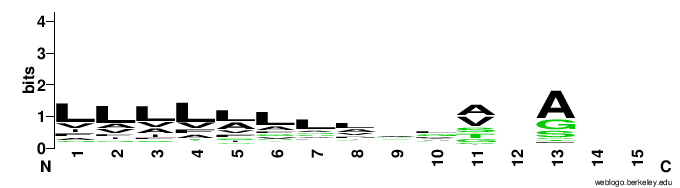

In [ ]:
df_false_negatives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'SP']
df_false_negatives = df_false_negatives.loc[df_false_negatives['Prediction'] == 0]

df_false_positives = df_benchmark_2.loc[df_benchmark_2['Class'] == 'NO_SP']
df_false_positives = df_false_positives.loc[df_false_positives['Prediction'] == 1]

<Axes: title={'center': 'False Negatives - von Heijne'}, ylabel='Counts'>

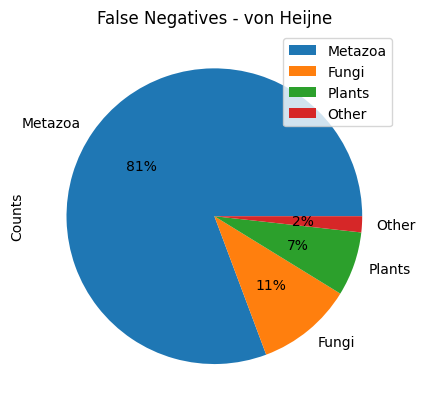

In [ ]:
##Pie plot according to the kingdom
df_false_negatives['Counts'] = np.zeros(len(df_false_negatives))
grp_df_false = df_false_negatives.groupby('Kingdom').count()
grp_df_false = grp_df_false.sort_values(by='Counts',ascending=False)
grp_df_false = grp_df_false.drop(grp_df_false.columns[[1, 2,3,4,5,6]], axis=1)
grp_df_false.columns=['Counts']
grp_df_false.plot(kind='pie',title = 'False Negatives - von Heijne', y='Counts', autopct='%.0f%%')

<Axes: title={'center': 'False Positives - von Heijne'}, ylabel='Counts'>

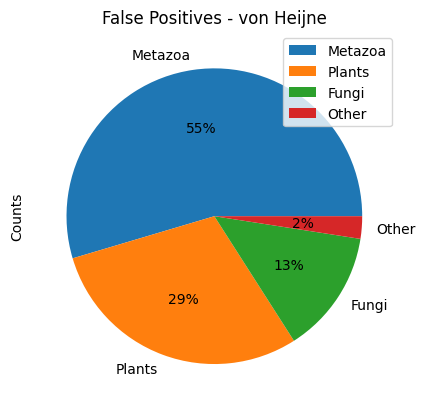

In [ ]:
##Pie plot according to the kingdom
df_false_positives['Counts'] = np.zeros(len(df_false_positives))
grp_df_false_positives = df_false_positives.groupby('Kingdom').count()
grp_df_false_positives = grp_df_false_positives.sort_values(by='Counts',ascending=False)
grp_df_false_positives = grp_df_false_positives.drop(grp_df_false_positives.columns[[1, 2,3,4,5,6]], axis=1)
grp_df_false_positives.columns=['Counts']
grp_df_false_positives.plot(kind='pie',title = 'False Positives - von Heijne', y='Counts', autopct='%.0f%%')

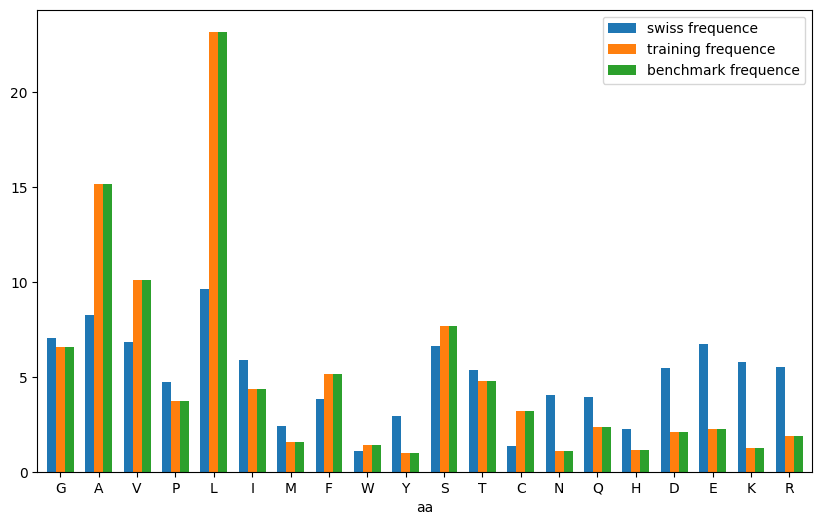

In [ ]:
from collections import defaultdict

#dataframe with the background of uniprot
aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
prctg=[7.07,8.25,6.86,4.74,9.65,5.91,2.41,3.86,1.10,2.92,6.64,5.35,1.38,4.06,3.93,2.27,5.46,6.72,5.80,5.53]
d = {'aa':aa,'prctg':prctg}
swiss = pd.DataFrame(d, columns=['aa','prctg'])

#I have to select only the signal peptides part, which I have already obtained before

train = training_seq_list_sp

bench = benchmark_cleavage_sequences


# Create a dictionary to store the frequencies
frequency_dict = defaultdict(int)

#total number of aminoacid in training set
total_number_train = 0

# Loop over the sequences and count the frequencies
for sequence in train:
    for letter in sequence:
        frequency_dict[letter] += 1
        total_number_train += 1

# Convert the defaultdict back to a regular dictionary
frequency_dict = dict(frequency_dict)

for key in frequency_dict.keys():
    #frequency_dict[key]=float(round((frequency_dict[key]/total_number_train*100), 2))
    frequency_dict[key] = float(round(frequency_dict[key] / total_number_train * 100, 2))

df_train= pd.DataFrame(list(frequency_dict.items()),columns = ['aa','prctg'])



# Create a dictionary to store the frequencies
frequency_dict_bench = defaultdict(int)

#total number of aminoacid in training set
total_number_bench = 0

# Loop over the sequences and count the frequencies
for sequence in train:
    for letter in sequence:
        frequency_dict_bench[letter] += 1
        total_number_bench += 1

# Convert the defaultdict back to a regular dictionary
frequency_dict_bench = dict(frequency_dict_bench)

for key in frequency_dict_bench.keys():
    #frequency_dict_bench[key]=float(round((frequency_dict_bench[key]/total_number_bench*100)), 2) #here I should insert the length of all aminoacids
    frequency_dict_bench[key] = float(round(frequency_dict_bench[key] / total_number_bench * 100, 2))

df_bench= pd.DataFrame(list(frequency_dict_bench.items()),columns = ['aa','prctg'])



'''

#dataframe training
train = df_train.query("Class == 'SP'") # I have to select only the signal peptides!!
s= train.iloc[:,5].values.tolist()
seq=''.join(s)
def char_frequency_train(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1
        else:
            dict[n] = 1
    return dict
training_frequency=char_frequency_train(seq)
for key in training_frequency.keys():
    training_frequency[key]=float(round((training_frequency[key]/len(seq)*100), 2))

df_train= pd.DataFrame(list(training_frequency.items()),columns = ['aa','prctg'])
'''
'''
#dataframe benchmark
df_bench = pd.read_csv('benchmark_set.tsv', sep='\t')
bench = df_bench.query("Class == 'SP'")
s_bench= bench.iloc[:,4].values.tolist()
seq_bench=''.join(s_bench)

benchmark_frequency = char_frequency_train(seq_bench)
for key in benchmark_frequency.keys():
    benchmark_frequency[key]=float(round((benchmark_frequency[key]/len(seq_bench)*100), 2))

df_bench = pd.DataFrame(list(benchmark_frequency.items()),columns = ['aa','prctg'])
'''


df_merge = pd.merge(swiss, df_train, on='aa', sort=False)             #final Data Frame
df_merge.columns=['aa','f_swiss','f_train']

df_merge2 = pd.merge(df_merge, df_bench, on='aa', sort=False)
df_merge2.columns=['aa','swiss frequence','training frequence', 'benchmark frequence']

fig, ax = plt.subplots(figsize=(10, 6))
df_merge2.set_index('aa').plot.bar(rot=0, width = 0.7, ax=ax)

plt.show()


In [ ]:
train

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...,...
1425,Q9Z0L3,Mus musculus (Mouse),Metazoa,SP,4,MIMLLMVGMLMAPCVGAHALDTPNPQELPPGLSKNINITFFNGVFK...,SSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1426,P20029,Mus musculus (Mouse),Metazoa,SP,4,MMKFTVVAAALLLLGAVRAEEEDKKEDVGTVVGIDLGTTYSCVGVF...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1427,P10645,Homo sapiens (Human),Metazoa,SP,4,MRSAAVLALLLCAGQVTALPVNSPMNKGDTEVMKCIVEVISDTLSK...,SSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1428,Q6T6S5,Bitis gabonica (Gaboon adder) (Gaboon viper),Metazoa,SP,4,MSSGGLLLLLGLLTLWAELTPVSGKKRPDFCYLPADTGPCMANFPR...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...


<Axes: title={'center': 'SP length distribution (Training Set)'}, ylabel='Frequency'>

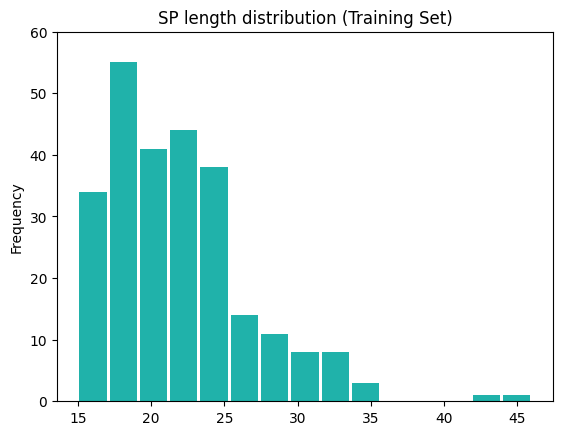

In [ ]:
#Calculate the length distribution of cleavage site of training set

df = pd.read_csv('training_set.tsv',sep = '\t')
#select only the ones that are class sp
df_sp = df.query("Class == 'SP'")
#I calculate the length of the site
sp_length = df_sp['SP cleavage-site annotation'].str.count('S').tolist()

sp_length_training = pd.Series(sp_length)

sp_length_training.plot.hist(grid=False, bins=15, rwidth=0.9,
                             title = 'SP length distribution (Training Set)',
                             ylabel = 'frequency',
                             color='lightseagreen',
                             ylim = [0,60])



Median =  21.0
Mean =  22.027131782945737
Standard Error =  0.2955753621365103
Standard deviation 4.747643313597741


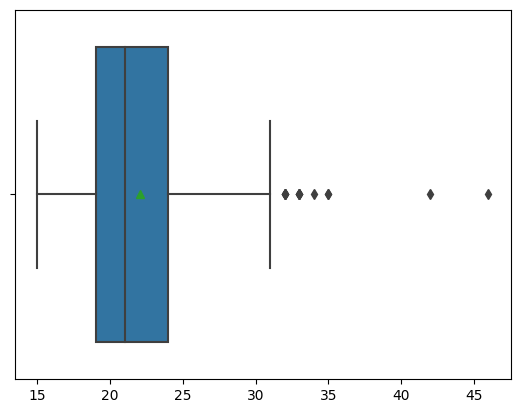

In [ ]:
#Total positives
sns.boxplot(x=sp_length_training, showmeans = True)
print('Median = ', sp_length_training.median())
print('Mean = ', sp_length_training.mean())
print('Standard Error = ', sp_length_training.sem())
print('Standard deviation', sp_length_training.std())

<Axes: title={'center': 'SP length distribution (Benchmark Set)'}, ylabel='Frequency'>

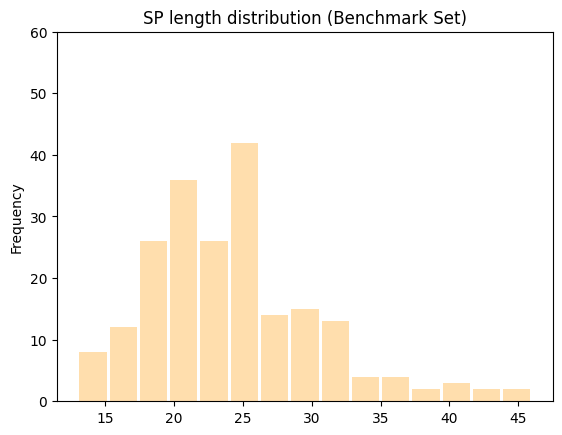

In [ ]:
#Calculate the length of false positives and true positives

df_benchmark = pd.read_csv('benchmark_set.tsv',sep = '\t')
#select only the ones that are class sp
df_benchmark_sp = df_benchmark.query("Class == 'SP'")
#I calculate the length of the site
sp_length_benchmark = df_benchmark_sp['SP cleavage-site annotation'].str.count('S').tolist()

sp_length_benchmark = pd.Series(sp_length_benchmark)

sp_length_benchmark.plot.hist(grid=False, bins=15, rwidth=0.9,
                             title = 'SP length distribution (Benchmark Set)',
                             ylabel = 'frequency',
                             color='navajowhite',
                             ylim = [0,60])


<Figure size 1200x1200 with 0 Axes>

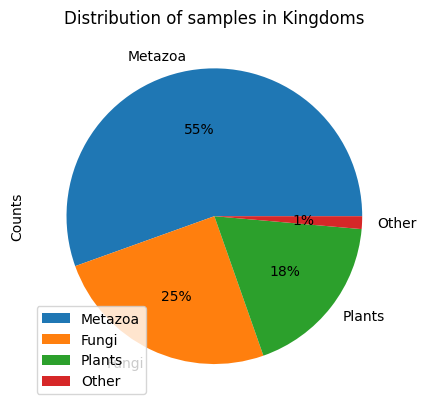

<Figure size 1200x1200 with 0 Axes>

In [ ]:
##Pie plot according to the kingdom
df['Counts'] = np.zeros(len(df))
grp_df_kingdom = df.groupby('Kingdom').count()
grp_df_kingdom = grp_df_kingdom.sort_values(by='Counts',ascending=False)
grp_df_kingdom = grp_df_kingdom.drop(grp_df_kingdom.columns[[1, 2,3,4,5,6]], axis=1)
grp_df_kingdom.columns=['Counts']
grp_df_kingdom.plot(kind='pie', y='Counts', autopct='%.0f%%')
plt.title('Distribution of samples in Kingdoms')
plt.figure(figsize=(12, 12))


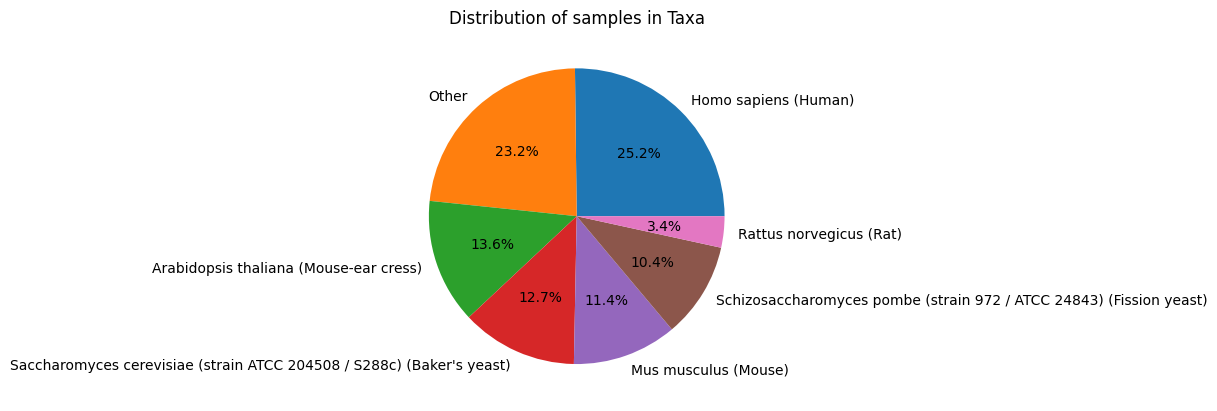

<Figure size 2000x2000 with 0 Axes>

In [ ]:

# Count the frequency of each unique value
value_counts = df['Taxa'].value_counts()

# Get the indexes of the values that are not in the top 4
other_indexes = value_counts.index[6:]

# Replace the values with 'Other'
df['Taxa'] = df['Taxa'].apply(lambda x: 'Other' if x in other_indexes else x)

# Count the frequency of each unique value again
value_counts = df['Taxa'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')

plt.title('Distribution of samples in Taxa')
plt.figure(figsize=(20, 20))
#This code creates a sample dataframe with a column "fruit", counts the frequency of each unique value in the "fruit" column, selects the indexes of the values that are not in the top 4, replaces those values with "Other", counts the frequency of each unique value again, and finally creates a pie chart using the updated value_counts. The autopct='%1.1f%%' argument formats the percentage values displayed on the chart.


plt.show()





In [ ]:
other_indexes = value_counts.index[6:]
other_indexes

Index(['Rattus norvegicus (Rat)'], dtype='object')